In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Large margin classification

<Figure size 720x216 with 0 Axes>

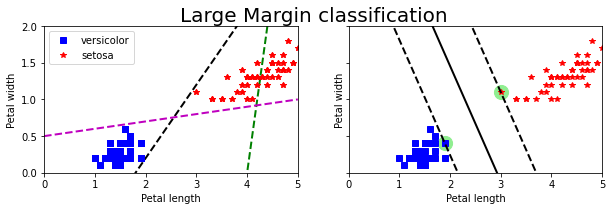

In [261]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = iris['target']
X = X[(y==1) | (y ==0)]
y = y[(y==1) | (y ==0)]
X_new = np.linspace(0,5,100)
y_pred1 = 5*X_new - 20
y_pred2 = X_new - 1.8
y_pred3 = 0.1 * X_new + 0.5
plt.figure(figsize=(10,3))

def plot_main(X,y):
  plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="versicolor")
  plt.plot(X[:,0][y==1], X[:,1][y==1], "r*", label="setosa")
  plt.xlabel("Petal length")
  plt.ylabel("Petal width")

def plot_boundary(model,min,max):
  w = model.coef_[0]
  b=model.intercept_[0]
  x = np.linspace(min,max,200)
  support = model.support_vectors_
  boundary = -w[0]/w[1] * x - b/w[1]
  upper= boundary+(1/w[1])
  lower= boundary-(1/w[1])
  plt.scatter(support[:,0],support[:,1],s=200,facecolors="lightgreen")
  plt.plot(x,boundary,"k-",lw=2)
  plt.plot(x,upper,"k--",lw=2)
  plt.plot(x,lower,"k--",lw=2)
  return True

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True, sharex=True)
plt.sca(axes[0])
plot_main(X,y)
plt.plot(X_new, y_pred1, "g--",lw=2)
plt.plot(X_new, y_pred2, "k--",lw=2)
plt.plot(X_new, y_pred3, "m--",lw=2)
plt.axis([0,5,0,2])
plt.legend(loc="upper left")
plot_graph(X,y,)

from sklearn.svm import SVC
SVC_model = SVC(kernel = "linear", C=float("inf"))
SVC_model.fit(X,y)
plt.sca(axes[1])
plot_main(X,y)
plot_boundary(SVC_model,0,5)
plt.suptitle("Large Margin classification", fontsize=20)
plt.savefig("Large_margin_sv")

# Sensitivity of scaled data

Text(1, 2.8, 'Scaled')

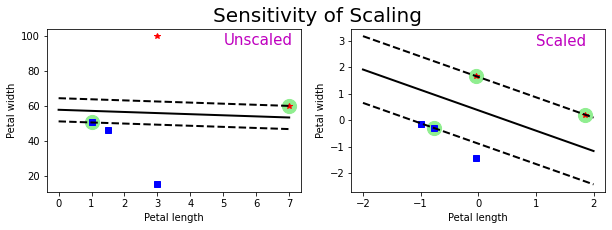

In [271]:
X_new = np.array([[1, 50.5], [3, 15], [3, 100], [7, 60], [1.5, 46]]).astype(np.float64)
y_new = np.array([0, 0, 1, 1,0])
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
fig.suptitle("Sensitivity of Scaling", fontsize=20)
plt.sca(axes[0])
plot_main(X_new,y_new)
SVC_new = SVC(kernel="linear", C=100)
SVC_new.fit(X_new,y_new)
plot_boundary(SVC_new,0,7)
plt.text(5,95,"Unscaled", fontsize=15, color="m")

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_new)
plt.sca(axes[1])
plot_main(X_scaled,y_new)
SVC_new.fit(X_scaled,y_new)
plot_boundary(SVC_new,-2,2)
plt.savefig("scaled_sv")
plt.text(1,2.8,"Scaled", fontsize=15, color="m")



# Sensitivity to outliers

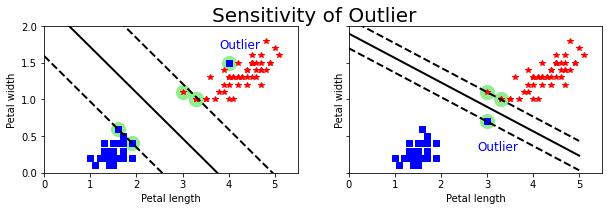

In [260]:
X_out1, y_out1 = np.array([[4,1.5]]),np.array([0])
X_out2, y_out2 = np.array([[3,0.7]]),np.array([0])

def add_outlier(arr,outlier):
  return np.concatenate((arr,outlier), axis=0)

SVC_new = SVC(kernel="linear", C=10**5)
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True, sharex=True)
fig.suptitle("Sensitivity of Outlier", fontsize=20)
plt.sca(axes[0])
plot_main(add_outlier(X,X_out1),add_outlier(y,y_out1))
SVC_new.fit(add_outlier(X,X_out1),add_outlier(y,y_out1))
plot_boundary(SVC_new,0,5)
plt.text(3.8,1.7,"Outlier", fontsize=12, color="blue")

plt.sca(axes[1])
plot_main(add_outlier(X,X_out2),add_outlier(y,y_out2))
SVC_new.fit(add_outlier(X,X_out2),add_outlier(y,y_out2))
plot_boundary(SVC_new,0,5)
plt.text(2.8,0.3,"Outlier", fontsize=12, color="blue")
plt.axis([0, 5.5, 0, 2])
plt.savefig("outlier_sv")